1. Jupyter notebook created. 

2. Several numpy arrays:
- 1000 samples of uniform distribution on interval [0,1]
- 1000 samples of normal distribution with mean 0 and standard deviation 1.
- 1000 samples of normal distribution with mean 0 and standard deviation 10.
- 1000 samples of beta distribution for the following pairs of parameters $(\alpha, \beta) \in (1,1), (2,2), (3,9)$
- 10000 samples of two-dimensional normal distributions each with mean $[0,0]^T$ and covariance matrices 
$$\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}$$



$$\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}$$


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(49)

In [44]:
# 1000 samples of uniform dist on interval [0,1]
uniform_samples = np.random.uniform(0,1, 1000)

# 1000 samples of normal dist, mean 0 std 1
normal_samples_u0s1 = np.random.normal(0, 1, 1000)

# 1000 samples of normal dist, mean 0 std 10
normal_samples_u0s10 = np.random.normal(0, 10, 1000)

# 1000 samples of beta distribution
beta_samples_a1b1 = np.random.beta(1, 1, 1000)
beta_samples_a2b2 = np.random.beta(2, 2, 1000)
beta_samples_a3b9 = np.random.beta(3, 9, 1000)

# 10000 samples of 2dim normal dist mean [0,0]^T with covariance matrixes:
mean_ = np.array([0, 0])
cov1 = np.array([[1, 0],
                 [0, 1]])
cov2 = np.array([[2, 1],
                 [1, 2]])

normal_2dim_1 = np.random.multivariate_normal(mean_, cov1, (10000))
normal_2dim_2 = np.random.multivariate_normal(mean_, cov2, (10000))

(10000, 2)

3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).

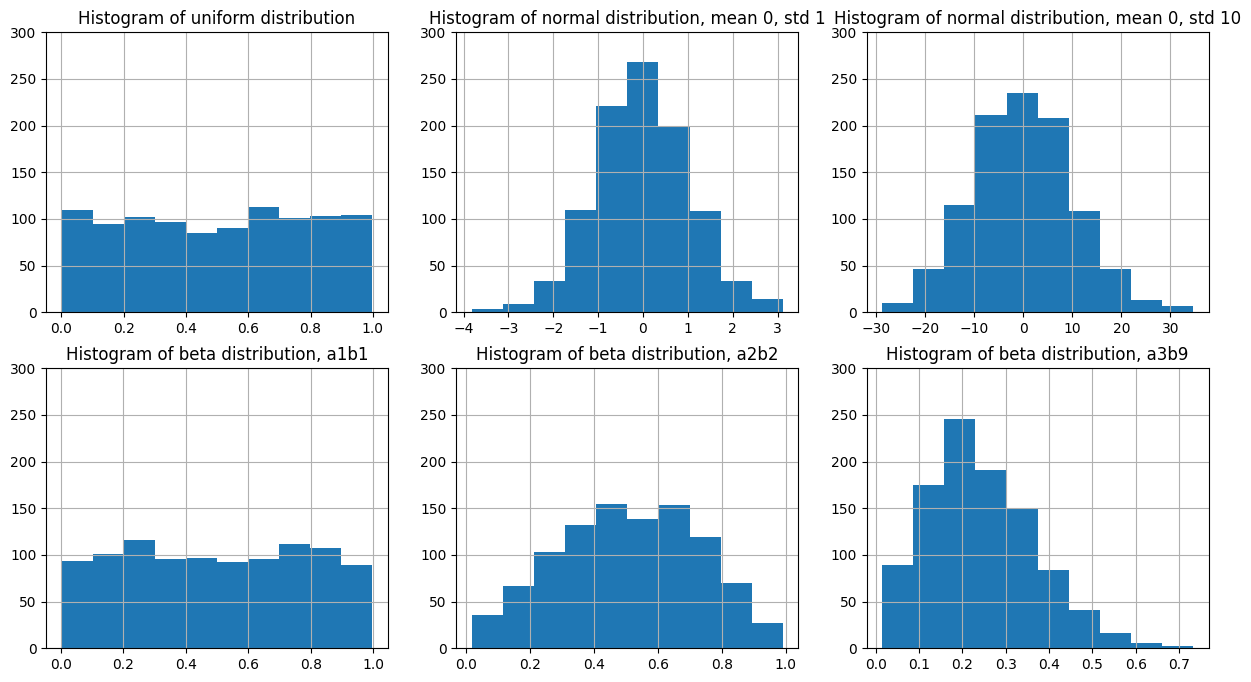

In [17]:
n_bins = 10
y_lims = [0, 300]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0,0].hist(uniform_samples, bins=n_bins)
axs[0,0].set_ylim(y_lims)
axs[0,0].set_title("Histogram of uniform distribution")
axs[0,0].grid()

axs[0,1].hist(normal_samples_u0s1, bins=n_bins)
axs[0,1].set_ylim(y_lims)
axs[0,1].set_title("Histogram of normal distribution, mean 0, std 1")
axs[0,1].grid()

axs[0,2].hist(normal_samples_u0s10, bins=n_bins)
axs[0,2].set_ylim(y_lims)
axs[0,2].set_title("Histogram of normal distribution, mean 0, std 10")
axs[0,2].grid()

axs[1,0].hist(beta_samples_a1b1, bins=n_bins)
axs[1,0].set_ylim(y_lims)
axs[1,0].set_title("Histogram of beta distribution, a1b1")
axs[1,0].grid()

axs[1,1].hist(beta_samples_a2b2, bins=n_bins)
axs[1,1].set_ylim(y_lims)
axs[1,1].set_title("Histogram of beta distribution, a2b2")
axs[1,1].grid()

axs[1,2].hist(beta_samples_a3b9, bins=n_bins)
axs[1,2].set_ylim(y_lims)
axs[1,2].set_title("Histogram of beta distribution, a3b9")
axs[1,2].grid()

plt.show()

4. For two-dimensional distributions use hist2d method from pyplot. Try to analyze influence of bins. Try different 2d histogram functions (ex. from seaborn)

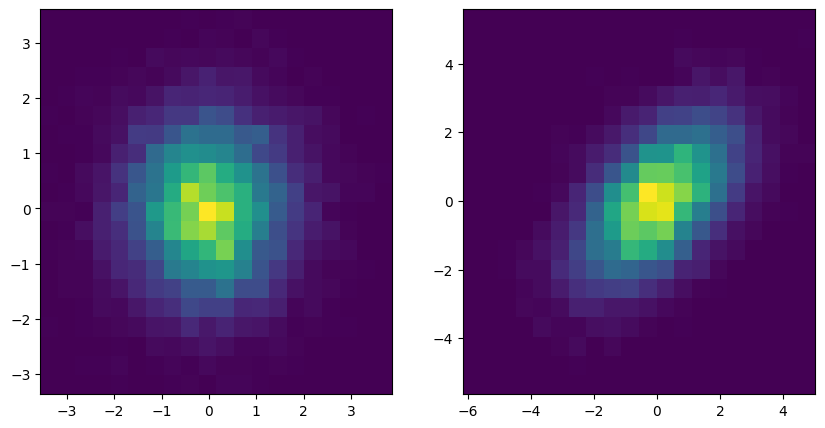

In [49]:
# visualisation with pyplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

n_bins = 20

axs[0].hist2d(normal_2dim_1[:,0], normal_2dim_1[:,1], bins=n_bins)
axs[1].hist2d(normal_2dim_2[:,0], normal_2dim_2[:,1], bins=n_bins)

plt.show()


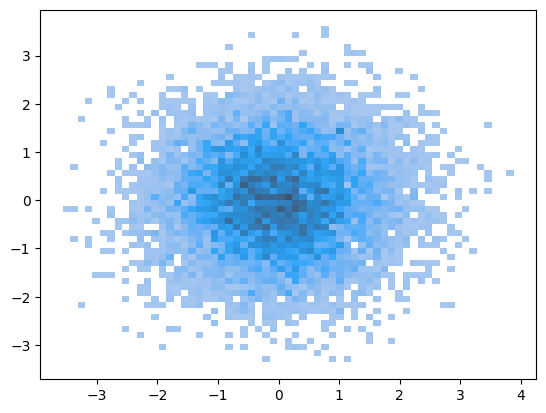

In [52]:
# seaborn:
sns.histplot(x = normal_2dim_1[:, 0],
             y = normal_2dim_1[:, 1])
plt.show()


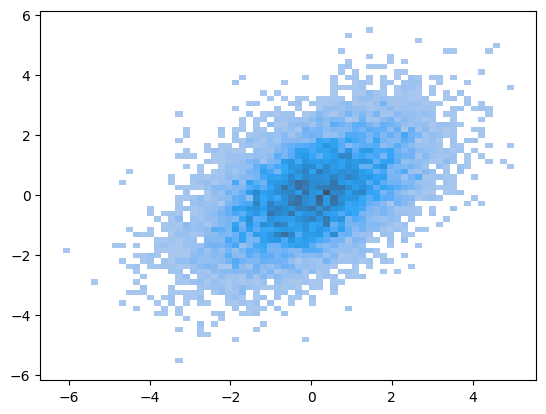

In [53]:
sns.histplot(x = normal_2dim_2[:, 0],
             y = normal_2dim_2[:, 1])
plt.show()

5. Generate 1000 $y$ points from the following model (
First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)
$$
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
    \mu={}& \alpha + \beta x\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
    x\sim{}&\mathrm{Normal}(0,3)\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} 
$$

In [59]:
n_samples = 1000

alpha = np.random.normal(2, 0.1, n_samples)
beta = np.random.normal(0.2, 0.2, n_samples)
x = np.random.normal(0, 3, n_samples)
sigma = np.abs(np.random.normal(0,1, n_samples))    #abs to get halfnormal

mean = alpha + beta*x
y = np.random.normal(mean, sigma)

6. Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot).  

ValueError: x and y must have same first dimension, but have shapes (2,) and (1000, 2)

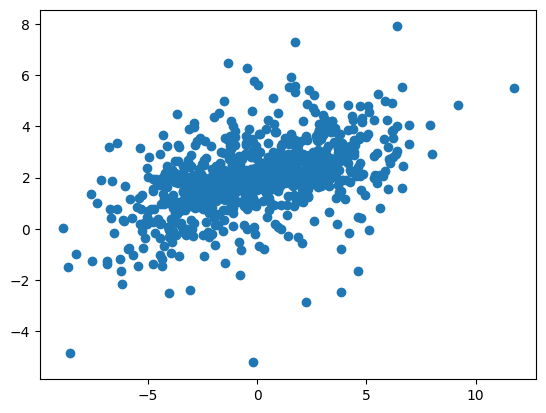

In [80]:
x_line = np.array([-6, 6])
beta_x = np.expand_dims(beta, 0).T * x_line.T
y_line = np.expand_dims(alpha, 0).T + beta_x

plt.scatter(x, y)
# TODO: below
plt.plot(x_line, y_line)


plt.show()

